# Fukushima U3 results visualisation
### Author: L. Fernandez Moguel
This Notebook is an example of visualisation with seaborn of a complex process in a time series (The Fukushima Unit 3 accident analysis), comparing measured data againt those obtain by modelling with MELCOR code. [Here](https://www.psi.ch/en/lrt/scientific-highlights/bsaf-2-analysis-of-unit-3-accident-and-fission-product-transport) more details about the analysis. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

4.14.3


### Data

The data employed in this example are not publicly available, they are used as an example hoe to visualize complex information at different levels on the same plot.

The data are divided in those obtained by measurement during the accident:


In [2]:
# Calculation data obtained with MELCOR
FU3 = pd.read_csv('data/FukuU3.csv')
FU3.head()

,Date,Seconds,Minutes,Hours,SH_LVL_c,DC_LVL_c,RPV_P_c,DW_P_c,WW_P_c,H2_gen_c
0,3/11/11 14:42,-300.000000,-5.000000,-0.083333,1.841617,6.200000,7.307952,0.145,0.145039,0.0
1,3/11/11 14:42,-299.999420,-4.999990,-0.083333,1.842713,6.199931,7.320549,0.145,0.145039,0.0
2,3/11/11 14:42,-299.998657,-4.999978,-0.083333,1.843327,6.199751,7.336439,0.145,0.145039,0.0
3,3/11/11 14:42,-299.997742,-4.999962,-0.083333,1.844884,6.199507,7.353177,0.145,0.145039,0.0
4,3/11/11 14:42,-289.990570,-4.833176,-0.080553,1.348155,6.124413,7.093238,0.145,0.145039,0.0


In [3]:
# Measurements recorded during the accident:
#Pressure
FU3_RPV_P = pd.read_csv("data/P_A.txt",delimiter="\t")
FU3_RPV_P['Time_h'] = FU3_RPV_P["Time_s"]/3600
# Water level
FU3_LVL = pd.read_csv("data/FU3_LVL.txt",delimiter="\t")
FU3_LVL.rename(columns={"time (s)": "Time_s", "time(h)": "Time_h"}, inplace=True)
# Drywell Pressure
FU3_DW_P = pd.read_csv("data/P_DW.txt",delimiter="\t")
FU3_DW_P['Time_h'] = FU3_DW_P["Time_s"]/3600
# Putting all together
FU3_data = pd.merge(FU3_RPV_P, FU3_DW_P, how="outer", on=["Time_h", "Time_s"])
FU3_data = pd.merge(FU3_data , FU3_LVL, how="outer", on=["Time_h", "Time_s"])
#
FU3_data.head()

,Time_s,RPV_P,Time_h,DW_P,RPV_LVL,DC_LVL
0,17400.0,7.2713,4.833333,NaN,NaN,NaN
1,19200.0,7.2013,5.333333,NaN,NaN,NaN
2,20580.0,7.2013,5.716667,0.145,NaN,NaN
3,22980.0,7.2913,6.383333,0.155,NaN,NaN
4,24180.0,7.3513,6.716667,NaN,NaN,NaN


# Define helper functions
The function below creates variables which indicate if the RPV is covered with water ('covered') or not ('uncovered'). This values will be used during the visualisation assign different colors and add information to the visualization.

In [4]:
def f(row):
    if row['SH_LVL_c' ]> -2:
        val = 'Covered'
    else:
        val = 'Uncovered'
    return val

In [5]:
def f_LH(row):
    if row['SH_LVL_c'] > -7:
        val = 'LH Covered'
    else:
        val = 'LH Uncovered'
    return val

In [6]:
FU3['state'] = FU3.apply(f, axis=1)

In [7]:
FU3['LH state'] = FU3.apply(f_LH, axis=1)

In [8]:
FU3.head()

,Date,Seconds,Minutes,Hours,SH_LVL_c,DC_LVL_c,RPV_P_c,DW_P_c,WW_P_c,H2_gen_c,state,LH state
0,3/11/11 14:42,-300.000000,-5.000000,-0.083333,1.841617,6.200000,7.307952,0.145,0.145039,0.0,Covered,LH Covered
1,3/11/11 14:42,-299.999420,-4.999990,-0.083333,1.842713,6.199931,7.320549,0.145,0.145039,0.0,Covered,LH Covered
2,3/11/11 14:42,-299.998657,-4.999978,-0.083333,1.843327,6.199751,7.336439,0.145,0.145039,0.0,Covered,LH Covered
3,3/11/11 14:42,-299.997742,-4.999962,-0.083333,1.844884,6.199507,7.353177,0.145,0.145039,0.0,Covered,LH Covered
4,3/11/11 14:42,-289.990570,-4.833176,-0.080553,1.348155,6.124413,7.093238,0.145,0.145039,0.0,Covered,LH Covered


## RPV Pressure
The figure below includes several levels of information. 

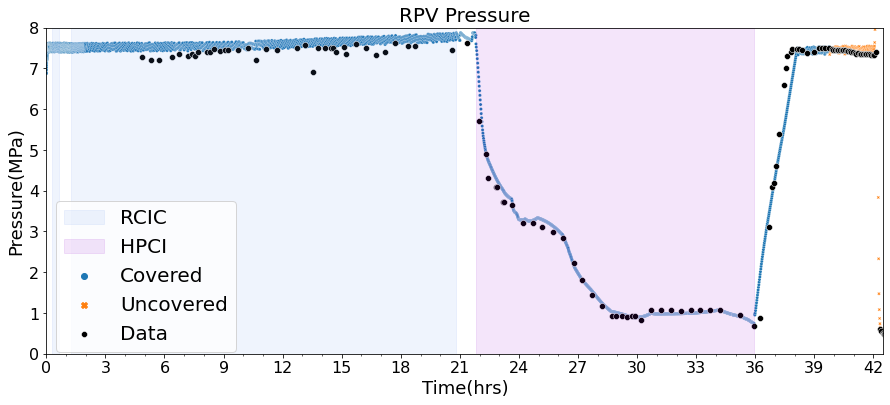

In [9]:
fig1, ax = plt.subplots(figsize=(15,6))
markers = {'Covered': "o", 'Uncovered': "X"}

# results obtained with MELCOR
sns.scatterplot(x='Hours', y='RPV_P_c', hue='state', style='state', 
                data=FU3, markers=markers, s=10).set_title('RPV Pressure',fontsize=20)

# Accident Data
sns.scatterplot(x=FU3_data['Time_h'], y=FU3_data['RPV_P'], label='Data', color='black')
#
plt.xlabel('Time(hrs)',fontsize=18)
plt.ylabel('Pressure(MPa)',fontsize=18)
ax.set_xlim([0, 42.5])
ax.set_ylim([0, 8])
#
# Axes and label format
ax.axvspan(0.3, 0.63, color='cornflowerblue', alpha=0.1, label='RCIC')
ax.axvspan(1.26, 20.81, color='cornflowerblue', alpha=0.1)
ax.axvspan(21.8, 35.95, color='darkviolet', alpha=0.1,label='HPCI')
ax.legend(bbox_to_anchor=(0.0, 0.5), loc=2, fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig('img/RPV_Pressure.png')
None

## Drywell Pressure

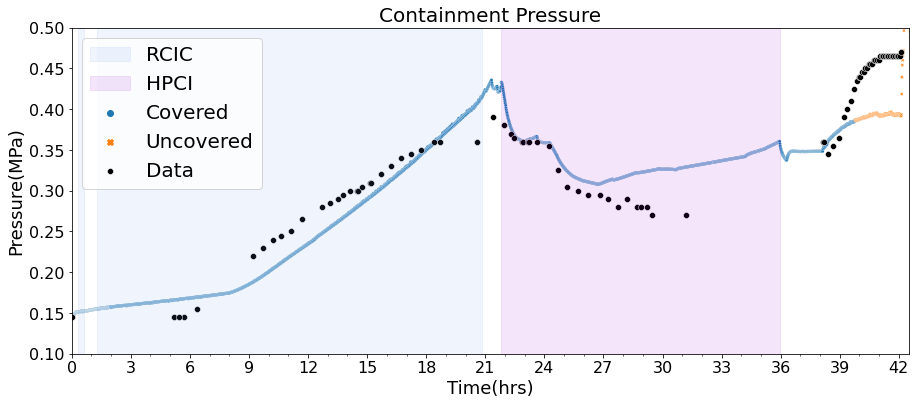

In [10]:
fig2, ax = plt.subplots(figsize=(15,6))
markers = {'Covered': "o", 'Uncovered': "X"}

# results obtained with MELCOR
sns.scatterplot(x='Hours', y='DW_P_c', hue='state', style='state', 
                data=FU3, markers=markers, s=10).set_title('Containment Pressure',fontsize=20)

# Data measured during the accident
sns.scatterplot(x=FU3_data['Time_h'], y=FU3_data['DW_P'], label='Data', color='black')
#
# Axis formating
plt.xlabel('Time(hrs)',fontsize=18)
plt.ylabel('Pressure(MPa)',fontsize=18)
ax.set_xlim([0, 42.5])
ax.set_ylim([0.1, 0.5])
#
# Areas indicating when water was ingresing to the RPV
ax.axvspan(0.3, 0.63, color='cornflowerblue', alpha=0.1, label='RCIC')
ax.axvspan(1.26, 20.81, color='cornflowerblue', alpha=0.1)
ax.axvspan(21.8, 35.95, color='darkviolet', alpha=0.1,label='HPCI')
ax.legend(bbox_to_anchor=(0.0, 1), loc=2, fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig('img/DW_Pressure.png')
None


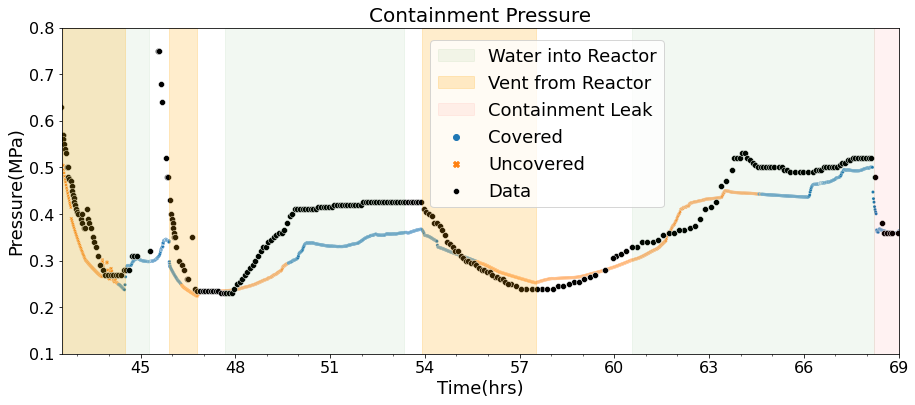

In [14]:
fig3, ax = plt.subplots(figsize=(15,6))
markers = {'Covered': "o", 'Uncovered': "X"}

# results obtained with MELCOR
sns.scatterplot(x='Hours', y='DW_P_c', hue='state', style='state', 
                data=FU3, markers=markers, s=10).set_title('Containment Pressure',fontsize=20)


# Data measured during the accident
sns.scatterplot(x=FU3_data['Time_h'], y=FU3_data['DW_P'], label='Data', color='black')

# Axis formating
plt.xlabel('Time(hrs)',fontsize=18)
plt.ylabel('Pressure(MPa)',fontsize=18)
ax.set_xlim([42.5, 69])
ax.set_ylim([0.1, 0.8])
#
# Areas indicating when water was ingresing to the RPV
ax.axvspan(42.05, 45.27, color='g', alpha=0.05, label='Water into Reactor')
ax.axvspan(47.67, 53.33, color='g', alpha=0.05)
ax.axvspan( 60.55, 68.23, color='g', alpha=0.05)
ax.axvspan( 73.73, 76.55, color='g', alpha=0.05)
ax.axvspan( 77.11, 78.44, color='g', alpha=0.05)
ax.axvspan( 83.71, 144, color='g', alpha=0.05)
#
# Areas indicating when Venting events or failures were taking place
ax.axvspan(42.55, 44.5, color='orange', alpha=0.2, label='Vent from Reactor')
ax.axvspan(45.9, 46.79, color='orange', alpha=0.2)
ax.axvspan( 53.9, 57.52, color='orange', alpha=0.2)
ax.axvspan( 68.23, 300, color='red', alpha=0.05,label='Containment Leak')
ax.axvspan( 97.3, 99.5, color='orange', alpha=0.2)
ax.axvspan( 114.38, 116.95, color='orange', alpha=0.2)
ax.axvspan( 119.73, 124.4167, color='orange', alpha=0.2)
ax.axvspan( 137.8, 151.25, color='orange', alpha=0.2)

# Legend positions and formating
ax.legend(bbox_to_anchor=(0.43, 0.99), loc=2, fontsize=18)
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig('img/DW_Pressure_42_69.png')
None


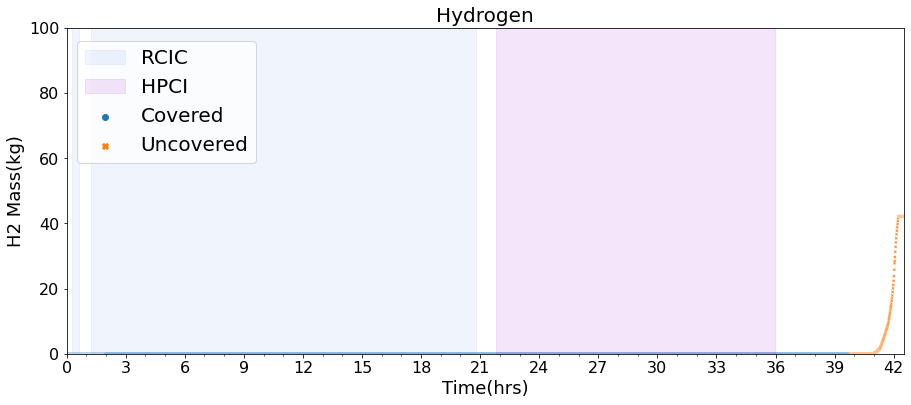

In [12]:
fig4, ax = plt.subplots(figsize=(15,6))
markers = {'Covered': "o", 'Uncovered': "X"}

# results obtained with MELCOR
sns.scatterplot(x='Hours', y='H2_gen_c', hue='state', style='state', 
                data=FU3, markers=markers, s=10).set_title('Hydrogen',fontsize=20)

# Axis formating
plt.xlabel('Time(hrs)',fontsize=18)
plt.ylabel('H2 Mass(kg)',fontsize=18)
ax.set_xlim([0, 42.5])
ax.set_ylim([0, 100])
#
# Water injection
ax.axvspan(0.3, 0.63, color='cornflowerblue', alpha=0.1, label='RCIC')
ax.axvspan(1.26, 20.81, color='cornflowerblue', alpha=0.1)
ax.axvspan(21.8, 35.95, color='darkviolet', alpha=0.1,label='HPCI')

# Legend position and formating
ax.legend(bbox_to_anchor=(0.0, 0.99), loc=2, fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig('img/Hydrogen_0_42.png')
None


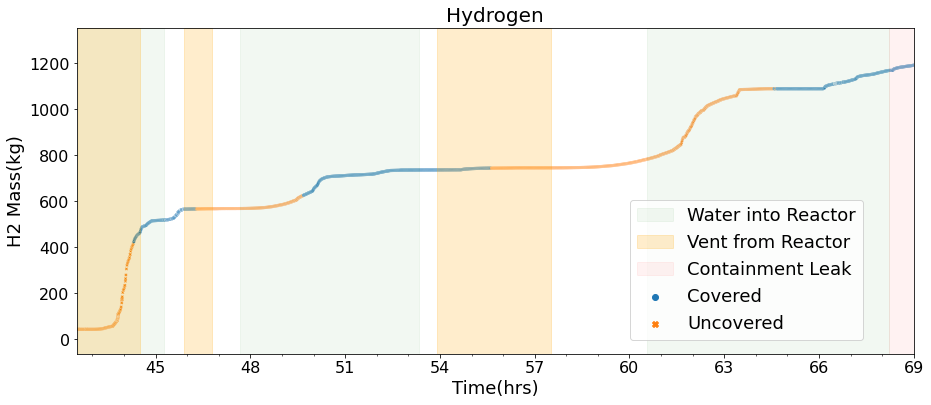

In [13]:
fig5, ax = plt.subplots(figsize=(15,6))
markers = {'Covered': "o", 'Uncovered': "X"}

# results obtained with MELCOR
sns.scatterplot(x='Hours', y='H2_gen_c', hue='state', style='state', 
                data=FU3, markers=markers, s=10).set_title('Hydrogen',fontsize=20)

# Axis formating
plt.xlabel('Time(hrs)',fontsize=18)
plt.ylabel('H2 Mass(kg)',fontsize=18)
ax.set_xlim([42.5, 69])
#
# Areas indicating when water was ingresing to the RPV
ax.axvspan(42.05, 45.27, color='g', alpha=0.05, label='Water into Reactor')
ax.axvspan(47.67, 53.33, color='g', alpha=0.05)
ax.axvspan( 60.55, 68.23, color='g', alpha=0.05)
ax.axvspan( 73.73, 76.55, color='g', alpha=0.05)
ax.axvspan( 77.11, 78.44, color='g', alpha=0.05)
ax.axvspan( 83.71, 144, color='g', alpha=0.05)
#
# Areas indicating when Venting events or failures were taking place
ax.axvspan(42.55, 44.5, color='orange', alpha=0.2, label='Vent from Reactor')
ax.axvspan(45.9, 46.79, color='orange', alpha=0.2)
ax.axvspan( 53.9, 57.52, color='orange', alpha=0.2)
ax.axvspan( 68.23, 300, color='red', alpha=0.05,label='Containment Leak')
ax.axvspan( 97.3, 99.5, color='orange', alpha=0.2)
ax.axvspan( 114.38, 116.95, color='orange', alpha=0.2)
ax.axvspan( 119.73, 124.4167, color='orange', alpha=0.2)
ax.axvspan( 137.8, 151.25, color='orange', alpha=0.2)

# Legend position and formating
ax.legend(bbox_to_anchor=(0.65, 0.5), loc=2, fontsize=18)
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig('img/Hydrogen_42_69.png')
None